<a href="https://colab.research.google.com/github/Vamsireddy72/Project/blob/main/DETECTING_SMS_SPAM_MESSAGES_USING_ML_AND_DEEP_LEARNING_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading and Reading Dataset

In [ ]:
df = pd.read_csv("Dataset_5971.csv")

In [ ]:
df.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


# Data Cleaning

In [ ]:
# Null values checking
df.isnull().sum()

,0
LABEL,0
TEXT,0
URL,0
EMAIL,0
PHONE,0


In [ ]:
# Duplicate values checking
duplicate_values = df.duplicated().sum()
print(duplicate_values)

17


In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)
df.reset_index(drop=True,inplace=True)
df.shape

(5954, 5)

# Feature Engineering

In [ ]:
def count_word(corpus):
    return len(corpus.split(' '))

def count_sentence(corpus):
    return len(re.split('[\.]+|\n', corpus))

df['No of characters'] = df['TEXT'].apply(len)
df['No of Words'] =  df['TEXT'].apply(count_word)
df['No of Lines'] = df['TEXT'].apply(count_sentence)

In [ ]:
df.head()

,LABEL,TEXT,URL,EMAIL,PHONE,No of characters,No of Words,No of Lines
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No,136,26,11
1,ham,What's up? Do you want me to come online? If y...,No,No,No,79,17,1
2,ham,So u workin overtime nigpun?,No,No,No,28,5,1
3,ham,"Also sir, i sent you an email about how to log...",No,No,No,173,33,5
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No,152,24,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LABEL             5954 non-null   object
 1   TEXT              5954 non-null   object
 2   URL               5954 non-null   object
 3   EMAIL             5954 non-null   object
 4   PHONE             5954 non-null   object
 5   No of characters  5954 non-null   int64 
 6   No of Words       5954 non-null   int64 
 7   No of Lines       5954 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 372.3+ KB


# Exploratory Data Analysis

In [ ]:
# Count occurrences of each label
label_counts = df['LABEL'].value_counts()

# Print summary
print("Count of Messages per LABEL:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Count of Messages per LABEL:
ham: 4834
Smishing: 609
spam: 466
Spam: 23
smishing: 22


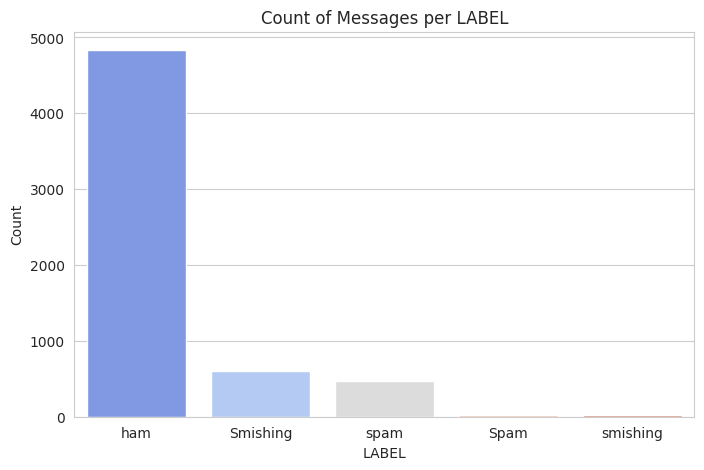

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='LABEL', data=df, palette='coolwarm')
plt.title("Count of Messages per LABEL")
plt.xlabel("LABEL")
plt.ylabel("Count")

# Show plot
plt.show()

In [ ]:
# Convert to lowercase
df['LABEL'] = df['LABEL'].str.lower()

# Merge all "spam" and "smishing" variations into "spam"
df['LABEL'] = df['LABEL'].replace({'spam': 'spam', 'smishing': 'spam'})

# Get the updated counts
cleaned_counts = df['LABEL'].value_counts()

# Print cleaned results
print("Cleaned Count of Messages per LABEL:")
for label, count in cleaned_counts.items():
    print(f"{label}: {count}")

Cleaned Count of Messages per LABEL:
ham: 4834
spam: 1120


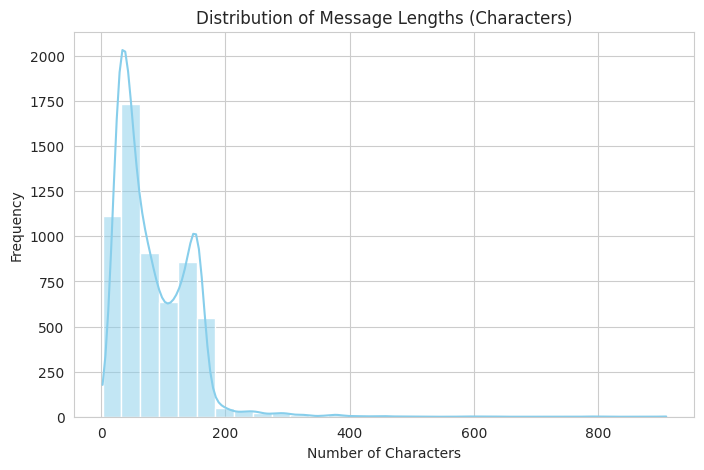

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['No of characters'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Message Lengths (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

# Show plot
plt.show()

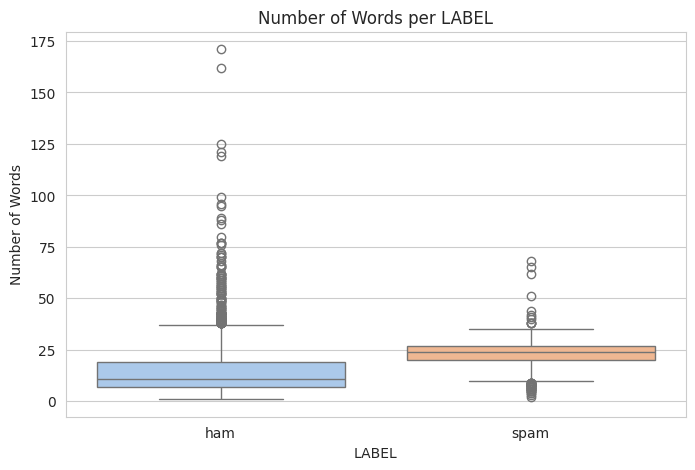

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='LABEL', y='No of Words', data=df, palette='pastel')
plt.title("Number of Words per LABEL")
plt.xlabel("LABEL")
plt.ylabel("Number of Words")

# Show plot
plt.show()

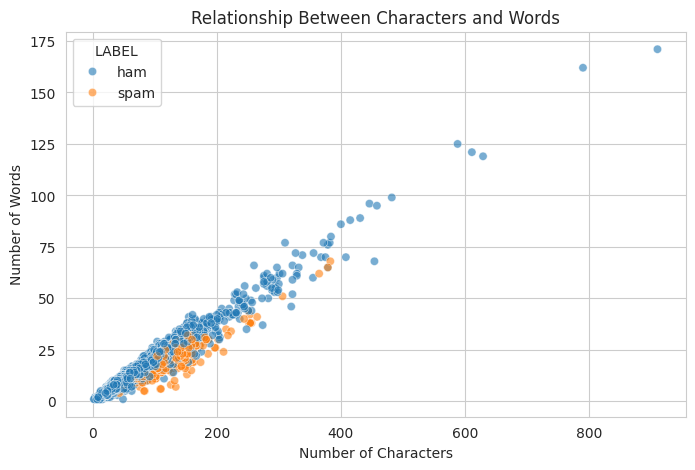

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='No of characters', y='No of Words', hue='LABEL', data=df, alpha=0.6)
plt.title("Relationship Between Characters and Words")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Words")
plt.legend(title="LABEL")

# Show plot
plt.show()

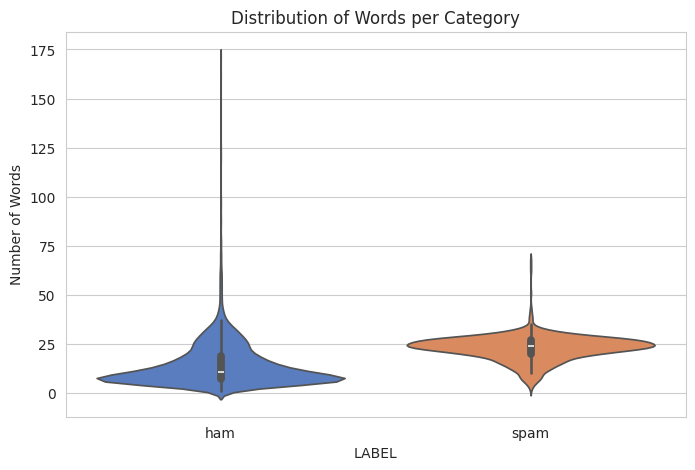

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Create violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='LABEL', y='No of Words', data=df, palette='muted')
plt.title("Distribution of Words per Category")
plt.xlabel("LABEL")
plt.ylabel("Number of Words")

# Show plot
plt.show()

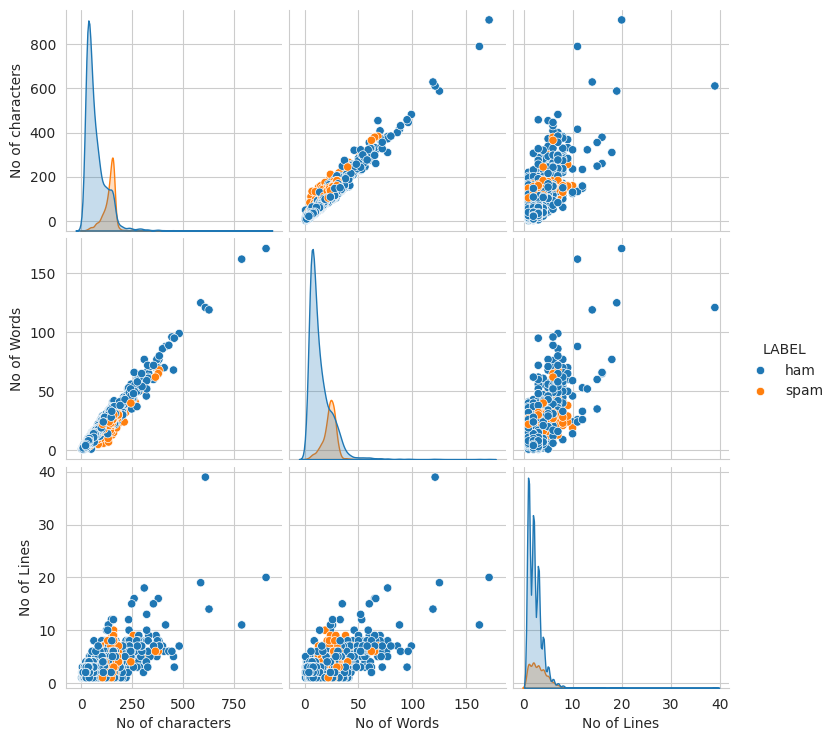

In [ ]:
sns.pairplot(data=df, vars=df.select_dtypes(exclude='object').columns, hue='LABEL')
plt.show()

# Data Pre-processing

In [ ]:
# Ensure stopwords is correctly accessed
stop_words = set(stopwords.words('english'))  # Convert to set for faster lookup

def stemming(corpus):
    corpus = corpus.lower()
    corpus = corpus.split()
    corpus = [word for word in corpus if word not in stop_words]  # Use stop_words
    corpus = " ".join(corpus)
    return corpus

# Apply function to DataFrame
df['TEXT'] = df['TEXT'].apply(stemming)

In [ ]:
df

,LABEL,TEXT,URL,EMAIL,PHONE,No of characters,No of Words,No of Lines
0,ham,opinion me? 1. 2. jada 3. kusruthi 4. lovable ...,No,No,No,136,26,11
1,ham,what's up? want come online? free talk sometime�,No,No,No,79,17,1
2,ham,u workin overtime nigpun?,No,No,No,28,5,1
3,ham,"also sir, sent email log usc payment portal. i...",No,No,No,173,33,5
4,spam,please stay home. encourage notion staying hom...,No,No,No,152,24,6
...,...,...,...,...,...,...,...,...
5949,ham,class. get text.,No,No,No,34,8,3
5950,ham,:( here....,No,No,No,24,5,2
5951,ham,becoz &lt;#&gt; jan whn al post ofice holiday ...,No,No,No,108,24,2
5952,ham,valentine game. . . send dis msg ur friends. ....,No,No,No,150,33,8


In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
new_df = vectorizer.fit_transform(df['TEXT'])
new_df = pd.DataFrame(new_df.toarray(), columns=vectorizer.get_feature_names_out())
new_df

,00,000,000pes,008704050406,0089,00euro,00pm,011,0121,01223585236,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dataframe conacting
df = pd.concat([df.drop('TEXT', axis = 1),new_df], axis = 1)
df.head()

,LABEL,URL,EMAIL,PHONE,No of characters,No of Words,No of Lines,00,000,000pes,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,ham,No,No,No,136,26,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,No,No,No,79,17,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,No,No,No,28,5,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,No,No,No,173,33,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,spam,No,No,No,152,24,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply encoding to each column
for col in ['URL', 'EMAIL', 'PHONE']:
    df[col] = encoder.fit_transform(df[col])

# Print the transformed DataFrame
print(df)

     LABEL  URL  EMAIL  PHONE  No of characters  No of Words  No of Lines  \
0      ham    0      0      0               136           26           11   
1      ham    0      0      0                79           17            1   
2      ham    0      0      0                28            5            1   
3      ham    0      0      0               173           33            5   
4     spam    0      0      0               152           24            6   
...    ...  ...    ...    ...               ...          ...          ...   
5949   ham    0      0      0                34            8            3   
5950   ham    0      0      0                24            5            2   
5951   ham    0      0      0               108           24            2   
5952   ham    0      0      0               150           33            8   
5953   ham    0      0      0                21            4            2   

       00  000  000pes  ...  zhong  zindgi  zoe  zogtorius  zoom  zouk  zya

# Data splitting after choosing target variable

In [ ]:
X = df.drop('LABEL', axis = 1)
y = df['LABEL']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Machine Learning Model Implementation

Logistic Regression Report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98       972
        spam       0.96      0.85      0.91       219

    accuracy                           0.97      1191
   macro avg       0.97      0.92      0.94      1191
weighted avg       0.97      0.97      0.97      1191

Accuracy: 0.9672544080604534


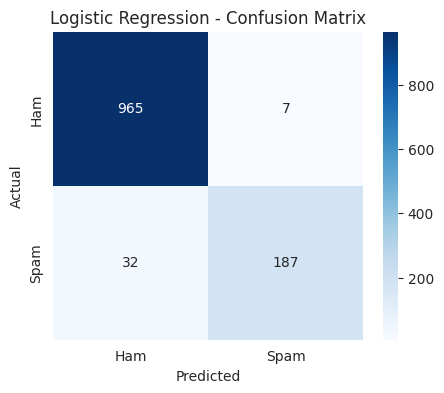

In [ ]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naïve Bayes Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       972
        spam       0.99      0.84      0.91       219

    accuracy                           0.97      1191
   macro avg       0.98      0.92      0.95      1191
weighted avg       0.97      0.97      0.97      1191

Accuracy: 0.9697732997481109


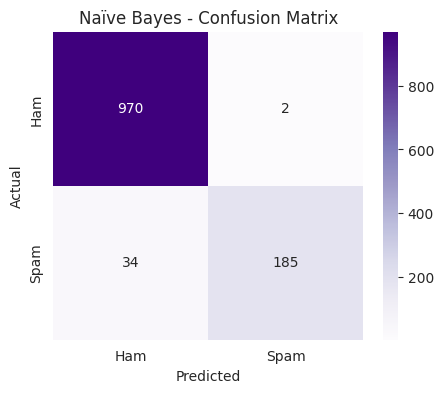

In [ ]:
# Train Naïve Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naïve Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Purples", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       972
        spam       0.97      0.89      0.93       219

    accuracy                           0.98      1191
   macro avg       0.97      0.94      0.96      1191
weighted avg       0.98      0.98      0.98      1191

Accuracy: 0.9756507136859782


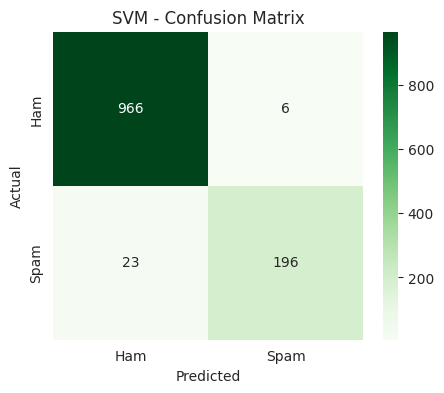

In [ ]:
# Train SVM Model
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       972
        spam       0.99      0.92      0.95       219

    accuracy                           0.98      1191
   macro avg       0.99      0.96      0.97      1191
weighted avg       0.98      0.98      0.98      1191

Accuracy: 0.9832073887489504


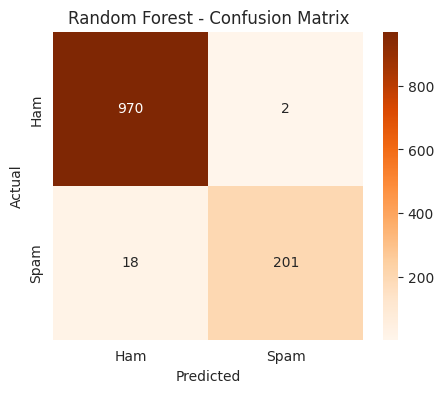

In [ ]:
# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Label Encoding and Splitting for Deep learning model implementation

In [ ]:
# Convert labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

In [ ]:
# Check column names
print(df.columns)

# Ensure column names are correct
df.columns = df.columns.str.strip()

Index(['LABEL', 'URL', 'EMAIL', 'PHONE', 'No of characters', 'No of Words',
       'No of Lines', '00', '000', '000pes',
       ...
       'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'èn',
       'ú1', '〨ud'],
      dtype='object', length=9542)


In [ ]:
# X should include all feature columns
X = df.drop(columns=['LABEL']).values  # Convert to NumPy array
y = df['LABEL'].values  # Labels

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert data types for TensorFlow compatibility
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Define the Deep Learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary output

# Evaluate model performance
print("\nClassification Report for :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7802 - loss: 0.6187 - val_accuracy: 0.9261 - val_loss: 0.2116
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9424 - loss: 0.1980 - val_accuracy: 0.9773 - val_loss: 0.0761
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9725 - loss: 0.0956 - val_accuracy: 0.9815 - val_loss: 0.0626
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9819 - loss: 0.0650 - val_accuracy: 0.9849 - val_loss: 0.0483
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9857 - val_loss: 0.0434
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9782 - val_loss: 0.0644
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9908 - val_loss: 0.0375
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accu